# Libraries

In [32]:
import scipy.io as sio
import sys

import pandas as pd
import numpy as np

import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.api import VAR

sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts

# Data

In [33]:
sst = sio.loadmat('data/sst.mat')
sst

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:14:49 2013',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[array([[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]])],
        [array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])],
        [array([[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]])],
        ...,
        [array([[29.58, 29.12,

In [34]:
tensor_shape = (len(sst['X']), sst['X'][0][0].shape[0], sst['X'][0][0].shape[1])
tensor_shape

(2000, 5, 6)

In [35]:
tensor_data = np.zeros(tensor_shape)
for i in range(tensor_shape[0]):
    tensor_data[i] = sst['X'][i][0]
tensor_data

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [36]:
N = len(tensor_data)
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


# LDS

In [37]:
train_tensor = jts.extract_train_tensor(tensor_data, N_train)
train_tensor

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.21, 29.03, 28.53, 28.37, 27.62, 27.97],
        [29.48, 28.78, 28.19, 26.28, 25.95, 25.73],
        [29.04, 28.46, 27.52, 25.5 , 23.52, 22.35],
        [29.49, 29.14, 28.04, 27.61, 25.64, 2

### Rotates the Tensor

In [38]:
train_tensor_rotated = np.empty((N_train, tensor_shape[2], tensor_shape[1]))
for i in range(N_train):
    train_tensor_rotated[i] = np.rot90(train_tensor[i])
train_tensor_rotated

array([[[29.26, 26.99, 24.95, 25.71, 27.01],
        [28.67, 27.12, 25.84, 27.3 , 27.63],
        [28.39, 28.09, 26.9 , 28.35, 28.41],
        [28.05, 27.88, 28.03, 28.44, 29.18],
        [28.27, 28.81, 27.69, 28.36, 29.73],
        [28.15, 28.43, 28.12, 28.56, 29.29]],

       [[29.44, 27.12, 25.07, 25.83, 27.01],
        [28.68, 27.19, 26.02, 27.41, 27.63],
        [28.53, 28.09, 26.93, 28.47, 28.55],
        [28.06, 27.89, 28.  , 28.45, 29.18],
        [28.27, 28.81, 27.7 , 28.34, 29.76],
        [28.16, 28.43, 28.11, 28.56, 29.31]],

       [[29.66, 27.33, 25.14, 25.98, 27.01],
        [28.68, 27.42, 26.17, 27.55, 27.63],
        [28.65, 28.09, 27.03, 28.6 , 28.74],
        [28.09, 27.93, 28.05, 28.52, 29.22],
        [28.3 , 28.81, 27.74, 28.33, 29.83],
        [28.19, 28.44, 28.13, 28.57, 29.34]],

       ...,

       [[27.97, 25.73, 22.35, 24.3 , 24.37],
        [27.62, 25.95, 23.52, 25.64, 26.25],
        [28.37, 26.28, 25.5 , 27.61, 27.6 ],
        [28.53, 28.19, 27.52, 28.04,

In [39]:
test_tensor = jts.extract_test_tensor(tensor_data, N_train, N_test)
test_tensor

array([[[29.32, 29.01, 28.58, 28.38, 27.63, 27.98],
        [29.45, 28.74, 28.19, 26.29, 25.96, 25.69],
        [29.  , 28.42, 27.52, 25.5 , 23.62, 22.75],
        [29.49, 29.14, 28.03, 27.61, 25.62, 24.38],
        [29.85, 29.48, 28.6 , 27.61, 26.28, 24.48]],

       [[29.35, 29.  , 28.6 , 28.39, 27.64, 27.99],
        [29.46, 28.75, 28.21, 26.32, 25.98, 25.68],
        [28.99, 28.41, 27.54, 25.54, 23.7 , 22.9 ],
        [29.48, 29.15, 28.05, 27.62, 25.65, 24.42],
        [29.83, 29.48, 28.62, 27.62, 26.29, 24.51]],

       [[29.29, 28.93, 28.62, 28.4 , 27.66, 28.  ],
        [29.47, 28.76, 28.24, 26.35, 25.97, 25.69],
        [29.01, 28.41, 27.58, 25.58, 23.74, 22.92],
        [29.48, 29.17, 28.08, 27.65, 25.67, 24.46],
        [29.84, 29.48, 28.67, 27.64, 26.32, 24.58]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [40]:
test_tensor_rotated = np.empty((N_test, tensor_shape[2], tensor_shape[1]))
for i in range(N_test):
    test_tensor_rotated[i] = np.rot90(test_tensor[i])
test_tensor_rotated

array([[[27.98, 25.69, 22.75, 24.38, 24.48],
        [27.63, 25.96, 23.62, 25.62, 26.28],
        [28.38, 26.29, 25.5 , 27.61, 27.61],
        [28.58, 28.19, 27.52, 28.03, 28.6 ],
        [29.01, 28.74, 28.42, 29.14, 29.48],
        [29.32, 29.45, 29.  , 29.49, 29.85]],

       [[27.99, 25.68, 22.9 , 24.42, 24.51],
        [27.64, 25.98, 23.7 , 25.65, 26.29],
        [28.39, 26.32, 25.54, 27.62, 27.62],
        [28.6 , 28.21, 27.54, 28.05, 28.62],
        [29.  , 28.75, 28.41, 29.15, 29.48],
        [29.35, 29.46, 28.99, 29.48, 29.83]],

       [[28.  , 25.69, 22.92, 24.46, 24.58],
        [27.66, 25.97, 23.74, 25.67, 26.32],
        [28.4 , 26.35, 25.58, 27.65, 27.64],
        [28.62, 28.24, 27.58, 28.08, 28.67],
        [28.93, 28.76, 28.41, 29.17, 29.48],
        [29.29, 29.47, 29.01, 29.48, 29.84]],

       ...,

       [[27.73, 23.33, 22.22, 23.81, 24.53],
        [27.29, 25.68, 23.54, 25.32, 26.62],
        [28.31, 25.8 , 25.91, 26.98, 27.6 ],
        [29.23, 28.56, 28.2 , 28.15,

In [41]:
train_model_sets_col = jts.split_cols_into_model_sets(train_tensor, N_train)
train_model_sets_row = jts.split_cols_into_model_sets(train_tensor_rotated, N_train)
test_model_sets_col = jts.split_cols_into_model_sets(test_tensor, N_test)
test_model_sets_row = jts.split_cols_into_model_sets(test_tensor_rotated, N_test)

In [42]:
result_model_sets_col = np.empty((tensor_shape[2], N_test, tensor_shape[1]))

for i in range(6):
    train_df = pd.DataFrame(train_model_sets_col[i])
    test_df = pd.DataFrame(test_model_sets_col[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df.diff().dropna()
    model = VAR(train_diff)
    fit = model.fit(1)

    test_df.columns = test_df.columns[:].astype(str)
    results_diff = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets_col[i] = jts.invert_diff_transformation(results_diff, train_df)

In [43]:
result_tensor_col = jts.collect_result_cols_into_tensor(result_model_sets_col, N_test)

In [44]:
result_model_sets_row_rotated = np.empty((tensor_shape[1], N_test, tensor_shape[2]))

for i in range(5):
    train_df = pd.DataFrame(train_model_sets_row[i])
    test_df = pd.DataFrame(test_model_sets_row[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df.diff().dropna()
    model = VAR(train_diff)
    fit = model.fit(1)

    test_df.columns = test_df.columns[:].astype(str)
    results_diff = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets_row_rotated[i] = jts.invert_diff_transformation(results_diff, train_df)

In [45]:
result_tensor_row_rotated = jts.collect_result_cols_into_tensor(result_model_sets_row_rotated, N_test)
result_tensor_row = np.empty((N_test, tensor_shape[1], tensor_shape[2]))
for i in range(N_test):
    result_tensor_row[i] = np.rot90(result_tensor_row_rotated[i], 3)

In [46]:
result_tensor_col.shape

(200, 5, 6)

In [47]:
result_tensor_row.shape

(200, 5, 6)

In [48]:
result_tensor = np.empty((N_test, tensor_shape[1], tensor_shape[2]))
for i in range(N_test):
    for j in range(tensor_shape[1]):
        for k in range(tensor_shape[2]):
            result_tensor[i][j][k] = np.mean([result_tensor_col[i][j][k], result_tensor_row[i][j][k]])

In [49]:
error_col = jts.calc_mape_per_matrix(test_tensor, result_tensor_col)
error_col = error_col.rename(columns={"MAPE": "2D-VAR COL"})
error_row = jts.calc_mape_per_matrix(test_tensor, result_tensor_row)
error_row = error_row.rename(columns={"MAPE": "2D-VAR ROW"})
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "2D-VAR"})
error

,2D-VAR
0,0.000883865
1,0.00164381
2,0.00194329
3,0.00257391
4,0.00424209
...,...
195,0.0206401
196,0.0199537
197,0.0200591
198,0.0207718


<AxesSubplot:>

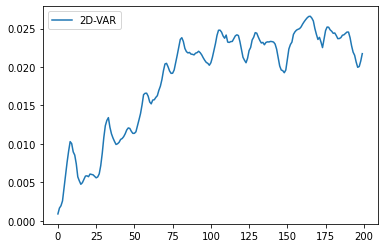

In [50]:
error.plot()

<AxesSubplot:>

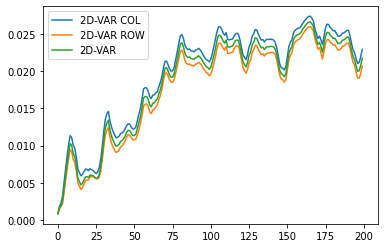

In [51]:
df = pd.concat([error_col, error_row, error], axis=1)
df.plot()

<AxesSubplot:>

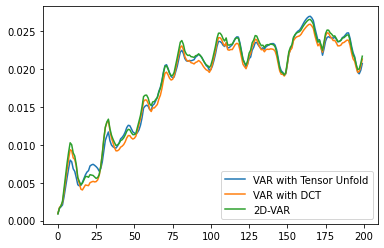

In [56]:
tensor_unfold_err = pd.read_csv("data/VAR_with_unfold.csv")
var_dct_err = pd.read_csv("data/VAR_dct.csv")
del tensor_unfold_err['Unnamed: 0']
del var_dct_err['Unnamed: 0']
df = pd.concat([tensor_unfold_err, var_dct_err, error], axis=1)
df.plot()

<AxesSubplot:>

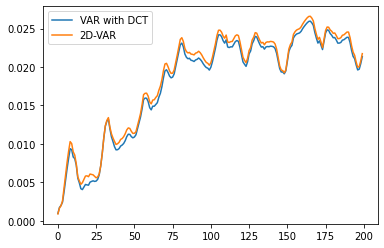

In [53]:
df = pd.concat([var_dct_err, error], axis=1)
df.plot()

<AxesSubplot:>

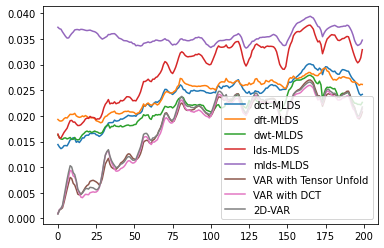

In [54]:
sst_err = sio.loadmat('data/sst_err.mat')
df = pd.DataFrame(np.transpose(sst_err['err_dct']), index=error.index, columns=["dct-MLDS"])
df1 = pd.DataFrame(np.transpose(sst_err['err_dft']), index=error.index, columns=["dft-MLDS"])
df2 = pd.DataFrame(np.transpose(sst_err['err_dwt']), index=error.index, columns=["dwt-MLDS"])
df3 = pd.DataFrame(np.transpose(sst_err['err_lds']), index=error.index, columns=["lds-MLDS"])
df4 = pd.DataFrame(np.transpose(sst_err['err_mlds']), index=error.index, columns=["mlds-MLDS"])
df = pd.concat([df, df1, df2, df3, df4, tensor_unfold_err, var_dct_err, error], axis=1)
df.plot()